In [62]:
import colorednoise
import matplotlib.pyplot as plt
from utils import *
import librosa
import librosa.display
import IPython.display as ipd
%matplotlib inline

In [8]:
def mix_db(x,y,db):
    E_x = np.mean(x**2)
    E_y = np.mean(y**2)
    
    a = E_x/(E_y*(10**(db/10)))
    lam = 1/(1+a)
    return lam*x+(1-lam)*y

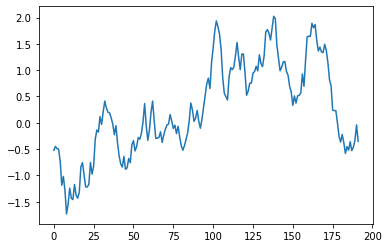

In [6]:
plt.plot(colorednoise.powerlaw_psd_gaussian(2,192))

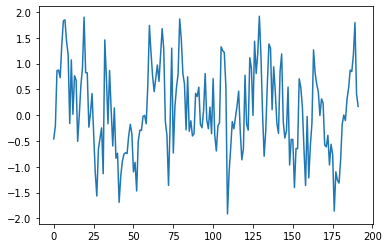

In [10]:
plt.plot(colorednoise.powerlaw_psd_gaussian(1,192))

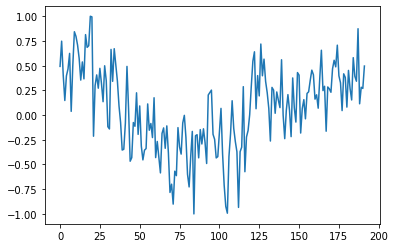

In [13]:
plt.plot(normalize(colorednoise.powerlaw_psd_gaussian(1,192)))

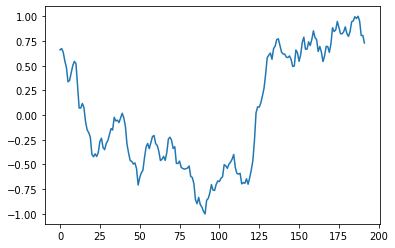

In [33]:
plt.plot(normalize(colorednoise.powerlaw_psd_gaussian(2,192)))

In [83]:
[x,egg],sr = librosa.load('./datasets/TrainData/CMU/bdl_arctic_a0001.wav',sr=16000,mono=False)
[y,egg_2],sr = librosa.load('./datasets/TestData/saarbrucken/1196-a_lhl.wav',sr=16000,mono=False)



In [260]:
music,sr = librosa.load('./datasets/TrainData/musical_noise/other_96.wav',sr=16000)
babble,sr = librosa.load('./datasets/TrainData/normal_noise/babble.wav',sr=16000)

In [22]:
ipd.Audio(x,rate=16000)

In [36]:
noise = normalize(colorednoise.powerlaw_psd_gaussian(1,x.shape[0]))

In [45]:
normal,sr = librosa.load('./datasets/TrainData/normal_noise/babble.wav',sr=16000)
musical,sr = librosa.load('./datasets/TrainData/musical_noise/other_26.wav',sr=16000)

In [40]:
ipd.Audio(mix_db(normalize(x),noise,-5),rate=16000)

In [54]:
ipd.Audio(mix_db(normalize(x),normalize(normal[1000:1000+x.shape[0]]),-5),rate=16000)

In [55]:
ipd.Audio(mix_db(normalize(x),normalize(musical[1000:1000+x.shape[0]]),-5),rate=16000)

(65, 193)


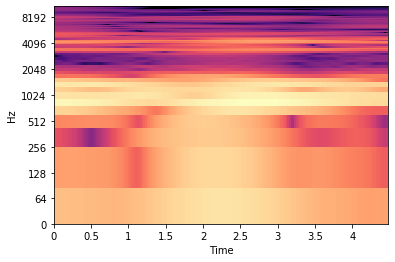

In [80]:
stft = np.abs(librosa.core.stft(normalize(x[5000:5192]),n_fft=128,hop_length=1))
print(stft.shape)
librosa.display.specshow(librosa.amplitude_to_db(stft,ref=np.max),y_axis='log', x_axis='time')

In [76]:
ipd.Audio(normalize(x[5000:5192]),rate=16000)

(97, 1)


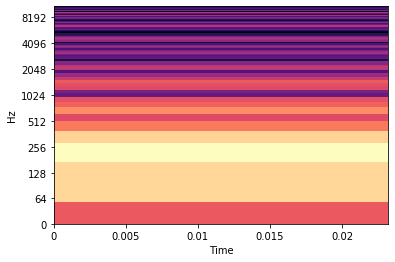

In [228]:
stft = np.abs(librosa.core.stft(normalize(egg[5000:5192]),n_fft=192,hop_length=192*2))
print(stft.shape)
librosa.display.specshow(librosa.amplitude_to_db(stft,ref=np.max),y_axis='log', x_axis='time')

(97, 1)


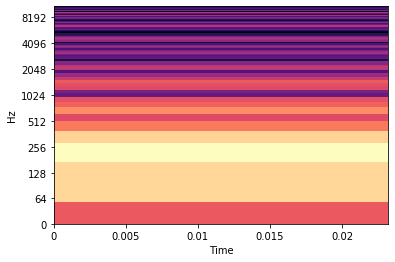

In [229]:
stft = np.abs(librosa.core.stft(normalize(egg_2[5000:5192]),n_fft=192,hop_length=192*2))
print(stft.shape)
librosa.display.specshow(librosa.amplitude_to_db(stft,ref=np.max),y_axis='log', x_axis='time')

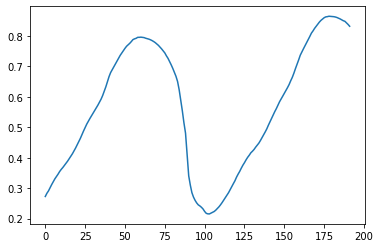

In [82]:
plt.plot(egg[5000:5192])

In [90]:
ipd.Audio(normalize(y[5000:5192]),rate=16000)

CPU times: user 0 ns, sys: 725 µs, total: 725 µs
Wall time: 622 µs


(65, 25)


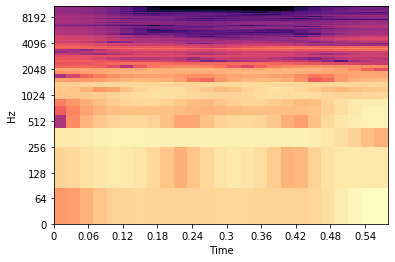

In [113]:
stft = np.abs(librosa.core.stft(normalize(y[5000:5192]),n_fft=128,hop_length=8))
print(stft.shape)
librosa.display.specshow(librosa.amplitude_to_db(stft,ref=np.max),y_axis='log', x_axis='time')

(65, 94)
CPU times: user 225 ms, sys: 0 ns, total: 225 ms
Wall time: 30.4 ms


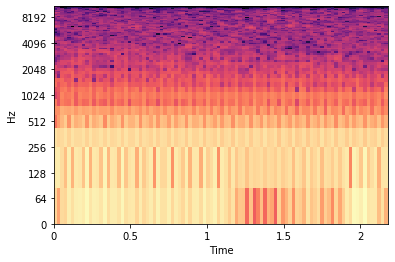

In [218]:
%%time

stft = np.abs(librosa.core.stft(normalize(egg_2[5000:8000]),n_fft=128,hop_length=32))
print(stft.shape)
librosa.display.specshow(librosa.amplitude_to_db(stft,ref=np.max),y_axis='log', x_axis='time')

In [221]:
y_out = librosa.istft(stft.astype('complex'), length=3000)

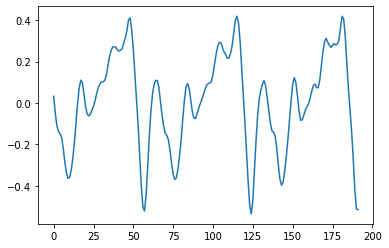

In [98]:
plt.plot(y[5000:5192])

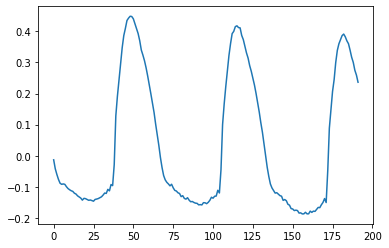

In [84]:
plt.plot(egg_2[5000:5192])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


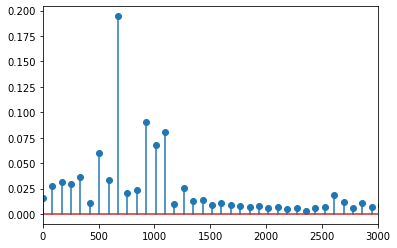

In [259]:
## fft
from scipy.fftpack import fft

N = 192
T = 1.0 / 16000.0

yf = fft(x[5000:5192], N)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

plt.stem(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.xlim(0, 3000)

plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


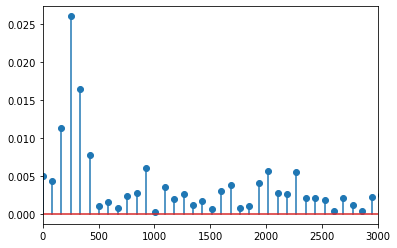

In [261]:
## fft
from scipy.fftpack import fft

N = 192
T = 1.0 / 16000.0

yf = fft(music[5000:5192], N)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

plt.stem(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.xlim(0, 3000)

plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


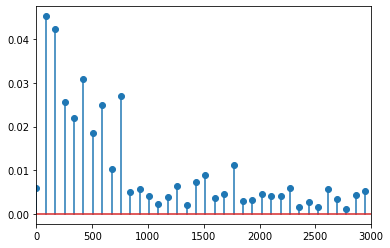

In [262]:
## fft
from scipy.fftpack import fft

N = 192
T = 1.0 / 16000.0

yf = fft(babble[5000:5192], N)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

plt.stem(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.xlim(0, 3000)

plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


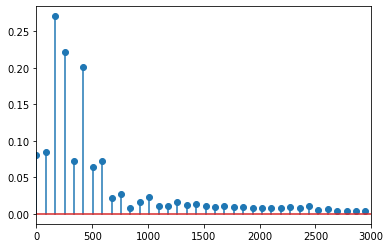

In [266]:
## fft

N = 192
T = 1.0 / 16000.0

yf = fft(y[5000:5192], N)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

plt.stem(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.xlim(0, 3000)

plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


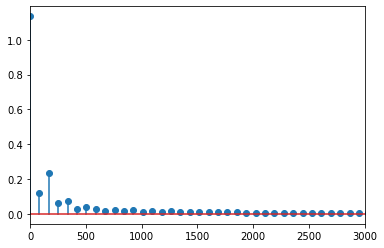

In [242]:
## fft

N = 192
T = 1.0 / 16000.0

yf = fft(egg[5000:5192], N)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

plt.stem(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.xlim(0, 3000)

plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


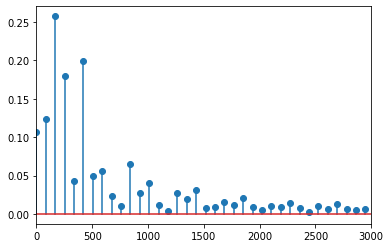

In [243]:
N = 192
T = 1.0 / 16000.0

yf = fft(egg_2[5000:5192], N)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

plt.stem(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.xlim(0, 3000)

plt.show()